# Метод опорных векторов

### Задача 1. 
Рассмотрим двухмерную задачу классификации с двумя классами $Y=\{+1, -1\}$. В обучающей выборке 5 точек  положительного класса: $(0,4),(2,4),(1,3),(1,5),(1,4),$ и 5 точек отрицательного класса: $(2,1),(4,0),(4,2),(4,1),(6,1)$. Найдите линейный классификатор $a(x)=w_0+w_1x_1+w_2x_2$, который будет получен в результате обучения методом опорных векторов.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics

В методе опорных векторов решается задача оптимизации:
$$ 
w, w_0, \xi = \mathop{\rm argmin}_{w, w_0, \xi} ( \frac{1}{2} \|w\|^2 
+ C \sum_{i=1}^N \xi_i),
$$
при ограничениях:
$$
y^{(i)} (w^{\top}x^{(i)} + w_0) \ge 1 - \xi_i,
\qquad
\xi_i \ge 0
\qquad
(i = 1,2,\dots, N).
$$



Исследуем зависимость положения разделяющей гиперплоскости в методе опорных векторов в зависимости от значения гиперпараметра $C$. Сгенерируем данные из многомерного нормального распределения и воспользуемся классом [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) для построения классификатора.

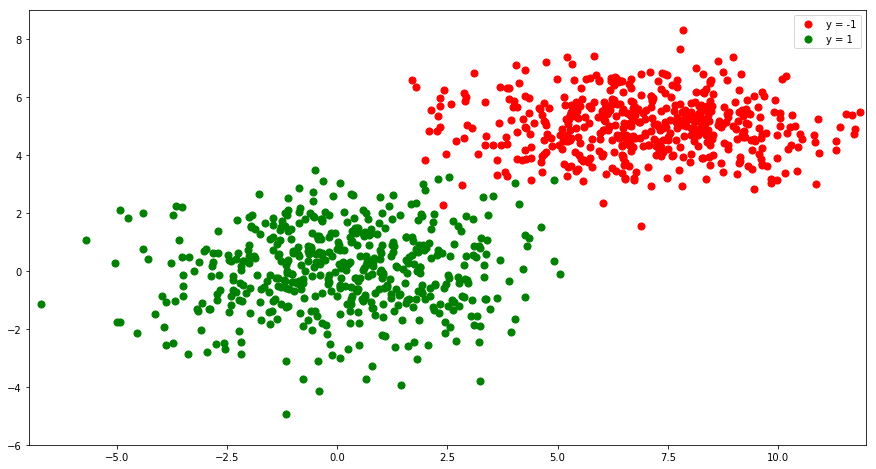

In [2]:
class_size=500
np.random.seed(11)

plt.figure(figsize=(15,8))
mean0 = [7, 5]
cov0 = [[4, 0], [0, 1]]  # diagonal covariance
mean1 = [0, 0]
cov1 = [[4, 0], [0, 2]]
data0 = np.random.multivariate_normal(mean0, cov0, class_size)
data1 = np.random.multivariate_normal(mean1, cov1, class_size)
data = np.vstack((data0, data1))
y = np.hstack((-np.ones(class_size), np.ones(class_size)))

plt.scatter(data0[:, 0], data0[:, 1], c='red', s=50)
plt.scatter(data1[:, 0], data1[:, 1], c='green', s=50)
plt.legend(['y = -1', 'y = 1'])
axes = plt.gca()
axes.set_xlim([-7,12])
axes.set_ylim([-6,9])
plt.show()

In [3]:
from sklearn.svm import SVC

SVM_classifier = SVC(C=0.01, kernel='linear') # changing C here
SVM_classifier.fit(data, y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

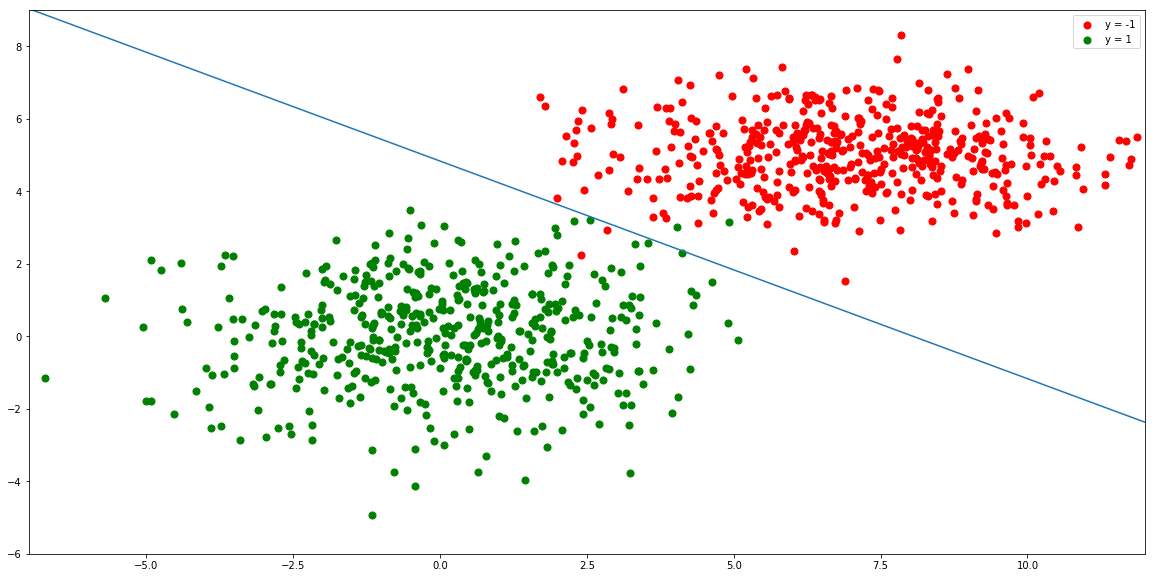

In [4]:
w_1 = SVM_classifier.coef_[0][0]
w_2 = SVM_classifier.coef_[0][1]
w_0 = SVM_classifier.intercept_[0]


plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red', s=50)
plt.scatter(data1[:, 0], data1[:, 1], c='green', s=50)
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-7, 12, 3000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)

axes = plt.gca()
axes.set_xlim([-7,12])
axes.set_ylim([-6,9])
plt.show()

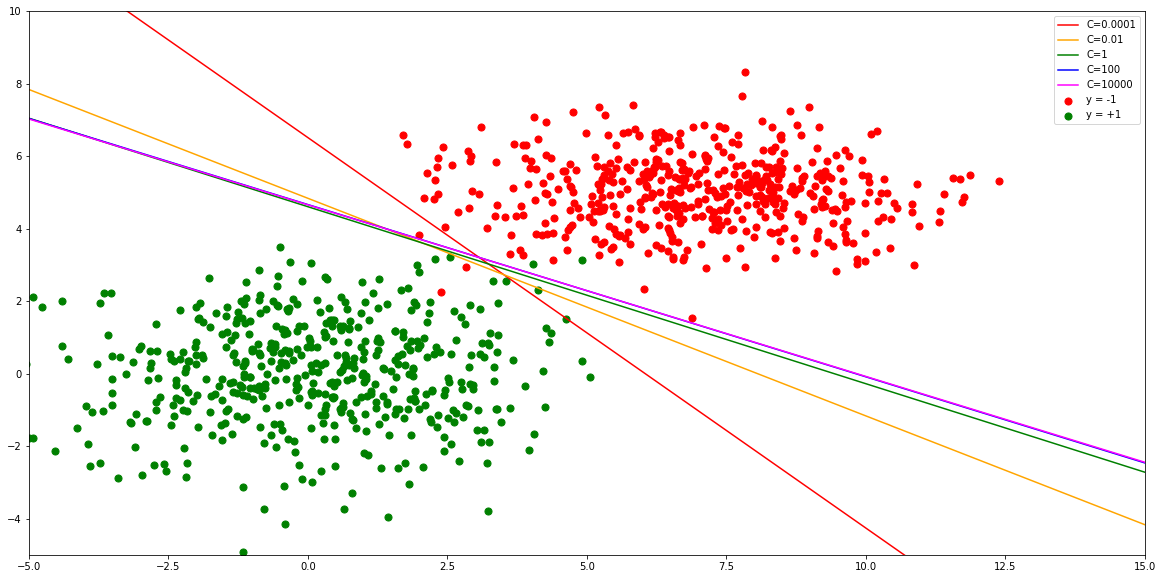

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red', s=50, label='y = -1')
plt.scatter(data1[:, 0], data1[:, 1], c='green', s=50, label='y = +1')
#plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-10, 15, 3000)
colors = ['red', 'orange', 'green', 'blue', 'magenta']

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    SVM_classifier = SVC(C=C, kernel='linear')
    SVM_classifier.fit(data, y)
    w_1 = SVM_classifier.coef_[0][0]
    w_2 = SVM_classifier.coef_[0][1]
    w_0 = SVM_classifier.intercept_[0]
    plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2, color=colors[i], label='C='+str(C))

axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.legend(loc=0)
plt.show()

Гиперпараметр $C$ отвечает за то, что является более приоритетным для классификатора, — "подгонка" под обучающую выборку или максимизация ширины разделяющей полосы.
 - При больших значениях $C$ классификатор сильно настраивается на обучение, тем самым сужая разделяющую полосу.
 - При маленьких значениях $C$ классификатор расширяет разделяющую полосу, при этом допуская ошибки на некоторых объектах обучающей выборки.

### Ядра в SVM

### Задача 2. 
Пусть $X \subset R^2$. Рассмотрим ядро $K(x,z)=(1+(x,z))^2$. Какому спрямляющему пространству и каким преобразованиям $\psi(x)$ соответсвует ядро?

### Задача 3.
Пусть известно ядро $K(x,z)$.
* Как вычислить норму вектора $\psi(x)$? 
* Как вычислить расстояние между векторами $\psi(x)$ и $\psi(z)$?
* Как изменить ядро, чтобы оно соответствовало скалярному произведению нормированных векторов в спрямляющем пространстве?

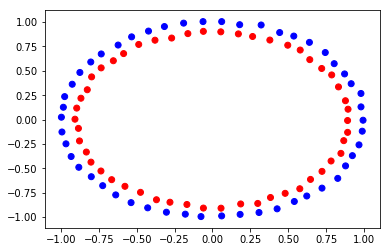

In [6]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = 0.9, noise = 0.01)
colors = np.array(['b', 'r'])[y]
plt.scatter(X[:, 0], X[:, 1], color = colors)

Ядро задает скалярное произведение в спрямленном пространстве.

* Линейное ядро – это обычное скалярное произведение: $k(x, x') = x^{\top} x'$ – спрямляющее пространство совпадает с исходным.

* Радиальное ядро

$$
k(x, x') = e^{-\gamma \|x-x'\|^2}
$$
* Полиномиальное ядро:
$$
k(x, x') = (\gamma (x^{\top} x')+r)^d
$$

In [7]:
SVM_classifier = SVC(kernel='linear') # changing C here
SVM_classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred=SVM_classifier.predict(X)
print ('Accuracy =', metrics.accuracy_score(y, y_pred))

Accuracy = 0.5


In [9]:
SVM_classifier = SVC(kernel='rbf') # changing C here
SVM_classifier.fit(X, y)

y_pred=SVM_classifier.predict(X)
print ('Accuracy =', metrics.accuracy_score(y, y_pred))

Accuracy = 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


####  Напишите функцию, которая строит разделяющую кривую: 
* определите минимальное и максимальное значения признаков $x_1$ и $x_2$;

* постройте сетку, используя [np.mgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html);

* используйте метод decision_function, возвращающий расстояние от заданной точки в пространстве признаков (x1,x2) до разделяющей кривой. 

* используйте [plt.contour](http://matplotlib.org/examples/pylab_examples/contour_demo.html), чтобы построить разделяющую кривую. 


In [0]:
#ваш код здесь